In [1]:
from likelihood_accretion import *
from detection import *
import matplotlib.pyplot as plt
import numpy as np
import time
from iminuit import Minuit
from scipy.stats import chi2   
import os.path
import pandas as pd 

#plt.style.use('style.mplstyle')

In [2]:
#Parameters allowed space
#Cooling
Tci, Tcf = 1, 10
tau_ci, tau_cf = 1, 40
Rci, Rcf = 1, 100
tau_i, tau_f = 1, 1.4
#Accretion
Tai, Taf = 0.1, 7
tau_ai, tau_af = 0.3, 3.5
Mai, Maf = 0, 0.6
#Off-set times
toff_K_i,toff_K_f =0,6
toff_I_i,toff_I_f =0,6
toff_B_i,toff_B_f =0,6
#nubar_e survival probability 
Pee_i,Pee_f=0,1


In [18]:
#NH
Likelihood_c_a_NH.errordef = Minuit.LEAST_SQUARES
x0_c_a_NH=np.array([4.81,4.16,12.3,1.2,   2.0,0.57,0.6,   0.0,0.47,0.0,   1.0]) 
m_c_a_NH = Minuit(Likelihood_c_a_NH, x0_c_a_NH)
m_c_a_NH.limits = [(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f), (Tai, Taf), (tau_ai, tau_af), (Mai, Maf),(toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f),(Pee_i,Pee_f)]
m_c_a_NH.fixed["x3"] = True
m_c_a_NH.fixed["x10"] = True
#IH
Likelihood_c_a_IH.errordef = Minuit.LEAST_SQUARES
x0_c_a_IH=np.array([3.98,4.62,14.5,1.2,   3.12,0.67,0.6,  0.0,0.0,0.0,    1.0])
m_c_a_IH = Minuit(Likelihood_c_a_IH, x0_c_a_IH)
m_c_a_IH.limits = [(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f), (Tai, Taf), (tau_ai, tau_af), (Mai, Maf),(toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f),(Pee_i,Pee_f)]
m_c_a_IH.fixed["x3"] = True
m_c_a_IH.fixed["x10"] = True
#Pee
Likelihood_c_a_Pee.errordef = Minuit.LEAST_SQUARES
x0_c_a_Pee=np.array([5.37,4.13,11.3,1.2,  1.91,0.58,0.6,  0.0,0.47,0.0,   0.5])
m_c_a_Pee = Minuit(Likelihood_c_a_Pee, x0_c_a_Pee)
m_c_a_Pee.limits = [(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f), (Tai, Taf), (tau_ai, tau_af), (Mai, Maf),(toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f),(Pee_i, Pee_f)]
m_c_a_Pee.fixed["x3"] = True


In [25]:
#NH
start_time = time.time()
m_c_a_NH.migrad()
m_c_a_NH_BF=np.array(m_c_a_NH.values)
m_c_a_NH_BFLH=m_c_a_NH.fval
#m_c_a_NH.minos()
#print("Minuit NH= %s minutes" % ((time.time() - start_time)/60))
#print(m_c_a_NH.params)

#IH
start_time = time.time()
m_c_a_IH.migrad()
m_c_a_IH_BF=np.array(m_c_a_IH.values)
m_c_a_IH_BFLH=m_c_a_IH.fval
#m_c_a_IH.minos()
#print("Minuit IH= %s minutes" % ((time.time() - start_time)/60))
#print(m_c_a_IH.params)

#Pee
start_time = time.time()
m_c_a_Pee.migrad()
m_c_a_Pee_BF=np.array(m_c_a_Pee.values)
m_c_a_Pee_BFLH=m_c_a_Pee.fval
#m_c_a_Pee.minos()
#print("Minuit Pee= %s minutes" % ((time.time() - start_time)/60))
#print(m_c_a_Pee.params)

m_c_a_NH_BF_aux= np.delete(m_c_a_NH_BF, 3)
m_c_a_IH_BF_aux= np.delete(m_c_a_IH_BF, 3)
m_c_a_Pee_BF_aux= np.delete(m_c_a_Pee_BF, 3)

/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis/cooling+accretion/detection.py:47: RuntimeWarning: invalid value encountered in sqrt
  p_pos = np.where(E_pos <= m_pos, 0., np.sqrt((E_pos**2)-(m_pos**2))) #positron momentum [MeV]
/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis/cooling+accretion/flavor_conversion.py:25: RuntimeWarning: divide by zero encountered in true_divide
  Pf=np.exp(U[0][2]**2*((20/E)**(2/3))/(-3.5*10**(-5)))


In [ ]:
print(m_c_a_NH_BF,m_c_a_NH_BFLH)
print()
print(m_c_a_IH_BF,m_c_a_IH_BFLH)
print()
print(m_c_a_Pee_BF,m_c_a_Pee_BFLH)


**Plots**

In [41]:
params=["Tc","tau_c","Rc","tau",'Ta','tau_a',"Ma","toff_K","toff_I","toff_B"]
params_lim=[(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f), 
            (Tai, Taf), (tau_ai, tau_af), (Mai, Maf), 
            (toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f)]
#x_c_a_NH,L_c_a_NH=[],[]
#x_c_a_IH,L_c_a_IH=[],[]
#x_c_a_Pee,L_c_a_Pee=[],[]

for i in range(len(params)):
    print(i)
    if i!=3:
        start_time = time.time()
        #NH
        m_c_a_NH.values=m_c_a_NH_BF
#        x, L ,status= m_c_a_NH.mnprofile("x%d"%i,size=20,bound=params_lim[i],subtract_min=True)
        x, L, Bfp, probls= param_profile(m_c_a_NH,"x%d"%i,params_lim[i][0],params_lim[i][1],size=40)
#        x_c_a_NH.append(x)
#        L_c_a_NH.append(L)

        ztmp=[]
        for j in range(len(x)):
            zztmp=[]
            zztmp.append(x[j])
            zztmp.append(L[j])
            for k in range(len(Bfp[j])):
                zztmp.append(Bfp[j][k])
            ztmp.append(zztmp)
        file_name="Output/NH_c_a"+str(i)+".npy"
        np.save(file_name, ztmp)
        file_name="Output/NH_c_a"+str(i)+"probls.npy"
        np.save(file_name, probls)
        
        #IH
        m_c_a_IH.values=m_c_a_IH_BF
#        x, L ,status= m_c_a_IH.mnprofile("x%d"%i,size=20,bound=params_lim[i],subtract_min=True)
        x, L, Bfp, probls = param_profile(m_c_a_IH,"x%d"%i,params_lim[i][0],params_lim[i][1],size=40)
#        x_c_a_IH.append(x)
#        L_c_a_IH.append(L)
        
        ztmp=[]
        for j in range(len(x)):
            zztmp=[]
            zztmp.append(x[j])
            zztmp.append(L[j])
            for k in range(len(Bfp[j])):
                zztmp.append(Bfp[j][k])
            ztmp.append(zztmp)
        file_name="Output/IH_c_a"+str(i)+".npy"
        np.save(file_name, ztmp)
        file_name="Output/IH_c_a"+str(i)+"probls.npy"
        np.save(file_name, probls)

        #Pee
        m_c_a_Pee.values=m_c_a_Pee_BF
#        x, L ,status= m_c_a_Pee.mnprofile("x%d"%i,size=20,bound=params_lim[i],subtract_min=True)
        x, L, Bfp, probls = param_profile(m_c_a_Pee,"x%d"%i,params_lim[i][0],params_lim[i][1],size=40)
#        x_c_a_Pee.append(x)
#        L_c_a_Pee.append(L)

        ztmp=[]
        for j in range(len(x)):
            zztmp=[]
            zztmp.append(x[j])
            zztmp.append(L[j])
            for k in range(len(Bfp[j])):
                zztmp.append(Bfp[j][k])
            ztmp.append(zztmp)
        file_name="Output/Pee_c_a"+str(i)+".npy"
        np.save(file_name, ztmp)
        file_name="Output/Pee_c_a"+str(i)+"probls.npy"
        np.save(file_name, probls)

        print("Minuit "'',params[i]," : ",((time.time() - start_time)/60)," minutes")



0
Faield to converge in  x0  =  1.2307692307692308
Faield to converge in  x0  =  2.6153846153846154
Minuit  Tc  :  13.106270202000935  minutes
1
Faield to converge in  x1  =  1.0
Faield to converge in  x1  =  29.0
Faield to converge in  x1  =  36.0
Faield to converge in  x1  =  39.0
Faield to converge in  x1  =  39.0
Minuit  tau_c  :  19.66256199280421  minutes
2
Faield to converge in  x2  =  1.0
Faield to converge in  x2  =  89.84615384615384
Faield to converge in  x2  =  56.84615384615384
Faield to converge in  x2  =  64.46153846153845
Faield to converge in  x2  =  74.61538461538461
Faield to converge in  x2  =  77.15384615384615
Faield to converge in  x2  =  79.6923076923077
Minuit  Rc  :  19.350130899747214  minutes
3
4
Faield to converge in  x4  =  0.1
Faield to converge in  x4  =  0.1
Faield to converge in  x4  =  3.992307692307693
Minuit  Ta  :  19.579554291566215  minutes
5
Minuit  tau_a  :  13.262626850605011  minutes
6
Faield to converge in  x6  =  0.0
Minuit  Ma  :  11.93184

In [44]:
params_label=[r"$T_c$ [MeV]",r"$\tau_c$ [s]",r"$R_c$ [km]",
        r"$T_a$ [MeV]",r"$\tau_a$ [s]",r"$M_a$ [$M_\odot$]",
        r"$t_{off}^K$ [s]", r"$t_{off}^I$ [s]",r"$t_{off}^B$ [s]"]

x_c_a_NH=[]
L_c_a_NH=[]
x_c_a_IH=[]
L_c_a_IH=[]
x_c_a_Pee=[]
L_c_a_Pee=[]

for i in range(len(params_label)+1):
    if(i!=3):

        ztmp1=np.load("Output/NH_c_a"+str(i)+".npy")
        xtmp1=[]
        ytmp1=[]
        for k in range(len(ztmp1)):
            xtmp1.append(ztmp1[k][0])
            ytmp1.append(ztmp1[k][1])
        ytmp1=ytmp1-np.amin(ytmp1)
        x_c_a_NH.append(xtmp1)
        L_c_a_NH.append(ytmp1)

        ztmp2=np.load("Output/IH_c_a"+str(i)+".npy")
        xtmp2=[]
        ytmp2=[]
        for k in range(len(ztmp2)):
            xtmp2.append(ztmp2[k][0])
            ytmp2.append(ztmp2[k][1])
        ytmp2=ytmp2-np.amin(ytmp2)
        x_c_a_IH.append(xtmp2)
        L_c_a_IH.append(ytmp2)
    
        ztmp3=np.load("Output/Pee_c_a"+str(i)+".npy")
        xtmp3=[]
        ytmp3=[]
        for k in range(len(ztmp3)):
            xtmp3.append(ztmp3[k][0])
            ytmp3.append(ztmp3[k][1])
        ytmp3=ytmp3-np.amin(ytmp3)
        x_c_a_Pee.append(xtmp3)
        L_c_a_Pee.append(ytmp3)




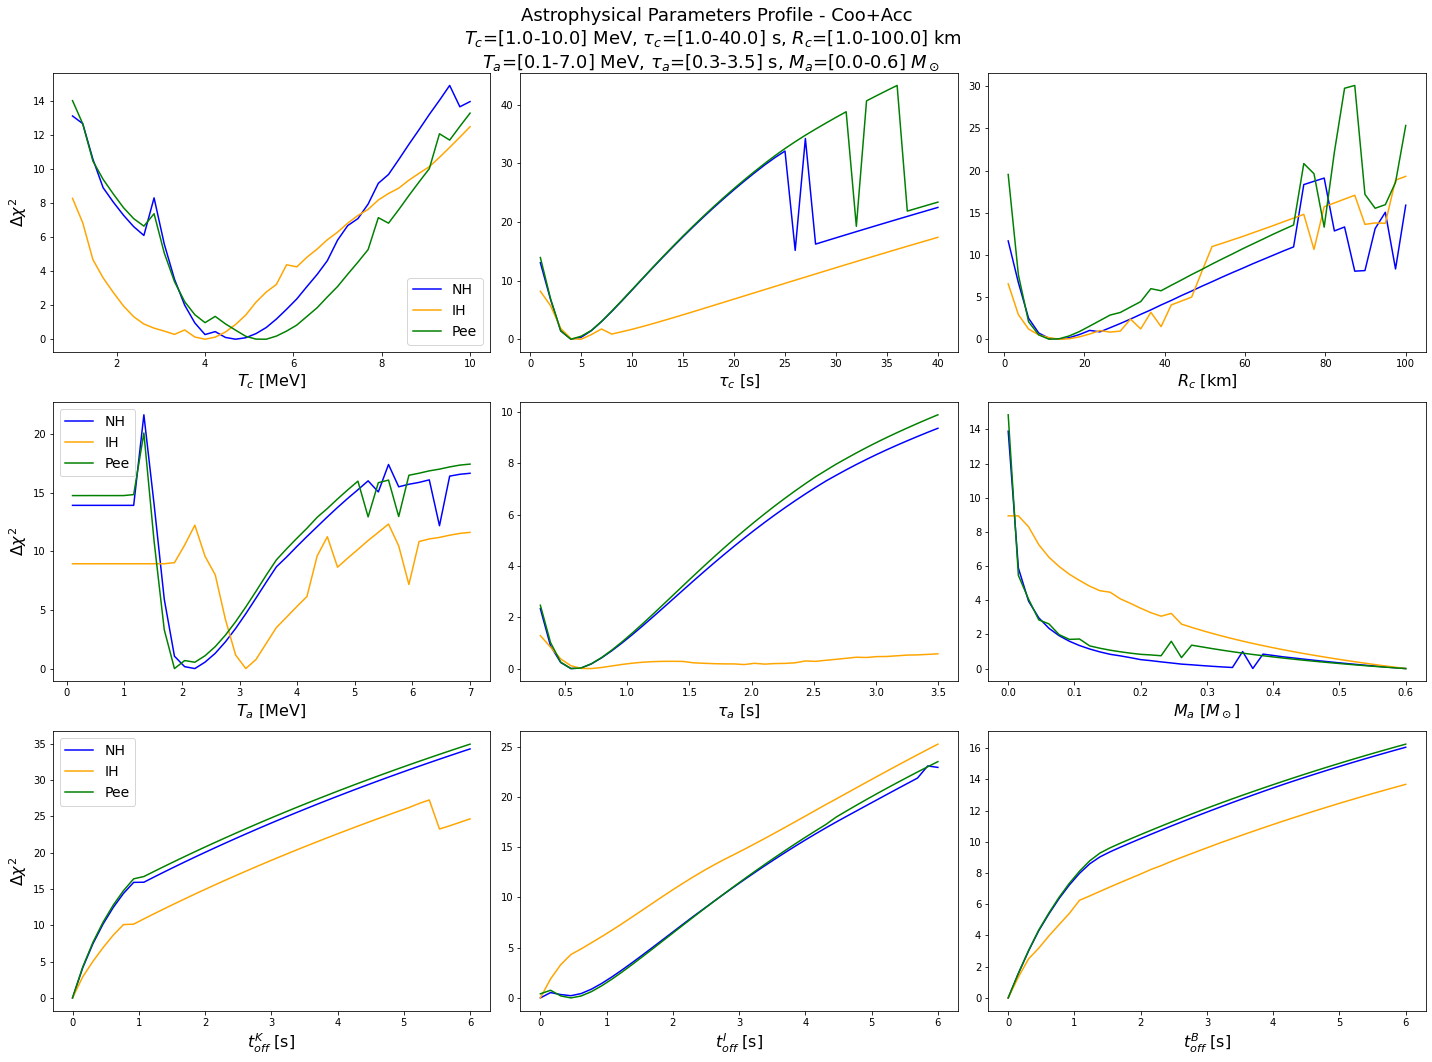

In [45]:
#Parameters allowed space
#Cooling
Tci, Tcf = 1, 10
tau_ci, tau_cf = 1, 40
Rci, Rcf = 1, 100
tau_i, tau_f = 1, 1.4
#Accretion
Tai, Taf = 0.1, 7
tau_ai, tau_af = 0.3, 3.5
Mai, Maf = 0, 0.6
#Off-set times
toff_K_i,toff_K_f =0,6
toff_I_i,toff_I_f =0,6
toff_B_i,toff_B_f =0,6
#nubar_e survival probability 
Pee_i,Pee_f=0,1

params_label=[r"$T_c$ [MeV]",r"$\tau_c$ [s]",r"$R_c$ [km]",
        r"$T_a$ [MeV]",r"$\tau_a$ [s]",r"$M_a$ [$M_\odot$]",
        r"$t_{off}^K$ [s]", r"$t_{off}^I$ [s]",r"$t_{off}^B$ [s]"]

plt.figure(figsize=(20,15))
for i in range(len(params_label)):
    plt.subplot(3,3,i+1)
    plt.plot(x_c_a_NH[i],L_c_a_NH[i],c='b', label='NH')
#    plt.axvline(m_c_a_NH_BF_aux[i],ls='--',c='b', label="NH - B.F.")
    
    plt.plot(x_c_a_IH[i],L_c_a_IH[i],c='orange', label='IH')
#    plt.axvline(m_c_a_IH_BF_aux[i],ls='--',c='orange', label="IH - B.F.")
    
    plt.plot(x_c_a_Pee[i],L_c_a_Pee[i],c='g', label='Pee')
#    plt.axvline(m_c_a_Pee_BF_aux[i],ls='--',c='g', label="Pee - B.F.")
        
#    plt.axhline(y=chi2.ppf(0.68, 1),label="c.l.=68%", ls='--', color='r', lw=0.5)
#    plt.axhline(y=chi2.ppf(0.95, 1),label="c.l.=95%", ls='--', color='r', lw=0.5)
#    plt.axhline(y=chi2.ppf(0.997, 1),label="c.l.=99.7%", ls='--', color='r', lw=0.5)
    plt.ylim(0,10)
    plt.xlabel(params_label[i],fontsize=16)
    if i%3==0:
        plt.ylabel(r'$\Delta\chi^2$',fontsize=16)
        plt.legend(fontsize=14)
    
plt.suptitle(r"Astrophysical Parameters Profile - Coo+Acc"+"\n"+
             r"$T_c$=[%.1f-%.1f] MeV, $\tau_c$=[%.1f-%.1f] s, $R_c$=[%.1f-%.1f] km  "%(Tci,Tcf,tau_ci,tau_cf,Rci,Rcf)+"\n"
             r"$T_a$=[%.1f-%.1f] MeV, $\tau_a$=[%.1f-%.1f] s, $M_a$=[%.1f-%.1f] $M_\odot$  "%(Tai,Taf,tau_ai,tau_af,Mai,Maf),fontsize=18)
plt.tight_layout()
plt.show()

In [13]:
m_c_a_NH_cont_BF_aux= np.delete(m_c_a_NH_cont_BF, 3)
m_c_a_IH_cont_BF_aux= np.delete(m_c_a_IH_cont_BF, 3)
m_c_a_Pee_cont_BF_aux= np.delete(m_c_a_Pee_cont_BF, 3)

# $P_{ee}$

In [15]:
tau_vec=[1,1.1,1.2,1.3,1.4,1.5]
m_c_a_Pee.fixed["x3"] = True

for tau in tau_vec:
    start_time = time.time()
    
#     #Cooling
#     m_c_Pee.values=m_c_Pee_BF
#     m_c_Pee.values["x3"]=tau
#     x_Pee, L_Pee = param_profile(m_c_Pee,"x4",0,1,size=40)
#     #Saving Arrays
#     file_name="Output/Pee_c_tau_"+str(tau)+".npy"
#     np.save(file_name, x_Pee)
#     file_name="Output/Like_Pee_c_tau_"+str(tau)+".npy"
#     np.save(file_name, L_Pee)
    
    #Cooling+Accretion
    m_c_a_Pee.values=m_c_a_Pee_BF
    m_c_a_Pee.values["x3"]=tau
    x_Pee, L_Pee = param_profile(m_c_a_Pee,"x7",0,1,size=40)
    #Saving Arrays
    file_name="Output/Pee_c_a_tau_"+str(tau)+".npy"
    np.save(file_name, x_Pee)
    file_name="Output/Like_Pee_c_a_tau_"+str(tau)+".npy"
    np.save(file_name, L_Pee)
    
    #Cooling+Accretion Conteporaneous
    m_c_a_Pee_cont.values=m_c_a_Pee_cont_BF
    m_c_a_Pee_cont.values["x3"]=tau
    x_Pee, L_Pee = param_profile(m_c_a_Pee_cont,"x7",0,1,size=40)
    #Saving Arrays
    file_name="Output/Pee_c_a_cont_tau_"+str(tau)+".npy"
    np.save(file_name, x_Pee)
    file_name="Output/Like_Pee_c_a_cont_tau_"+str(tau)+".npy"
    np.save(file_name, L_Pee)

#     #Cooling+Accretion Ma limeted
#     m_c_a_Pee_Ma.values=m_c_a_Pee_Ma_BF
#     m_c_a_Pee_Ma.values["x3"]=tau
#     x_Pee, L_Pee = param_profile(m_c_a_Pee_Ma,"x7",0,1,size=40)
#     #Saving Arrays
#     file_name="Output/Pee_c_a_Ma_tau_"+str(tau)+".npy"
#     np.save(file_name, x_Pee)
#     file_name="Output/Like_Pee_c_a_Ma_tau_"+str(tau)+".npy"
#     np.save(file_name, L_Pee)
    
    print("Pee tau=%.2f took %s minutes" % (tau,(time.time() - start_time)/60))

/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis/cooling+accretion/detection.py:47: RuntimeWarning: invalid value encountered in sqrt
  p_pos = np.where(E_pos <= m_pos, 0., np.sqrt((E_pos**2)-(m_pos**2))) #positron momentum [MeV]


Faield to converge in  x7  =  0.3846153846153846
Pee tau=1.00 took 5.029887020587921 minutes


/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis/cooling+accretion/fluxes.py:98: RuntimeWarning: overflow encountered in exp
  ge = Epos_vec(Enu)**2/(1 + np.exp(Epos_vec(Enu)/Ta0))


Pee tau=1.10 took 6.282774698734284 minutes
Pee tau=1.20 took 8.298888079325359 minutes


/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis/cooling+accretion/fluxes.py:25: RuntimeWarning: overflow encountered in exp
  ge = Enu**2/(1 + np.exp(Enu/Tc(t, Tc0, tau_c)))


Faield to converge in  x7  =  0.0
Pee tau=1.30 took 9.117031308015187 minutes
Faield to converge in  x7  =  0.0
Faield to converge in  x7  =  0.0
Pee tau=1.40 took 10.419770689805349 minutes
Faield to converge in  x7  =  0.0
Pee tau=1.50 took 11.444191217422485 minutes


In [16]:
#This data have efficiency, background
tau_vec=[1,1.1,1.2,1.3,1.4]
x_Pee_c=[]
L_Pee_c=[]
x_Pee_c_a=[]
L_Pee_c_a=[]
x_Pee_c_a_cont=[]
L_Pee_c_a_cont=[]
x_Pee_c_a_Ma=[]
L_Pee_c_a_Ma=[]

#Load
for tau in tau_vec:
    x_Pee_c.append(np.load("Output/Pee_c_tau_"+str(tau)+".npy"))
    L_Pee_c.append(np.load("Output/Like_Pee_c_tau_"+str(tau)+".npy"))
    x_Pee_c_a.append(np.load("Output/Pee_c_a_tau_"+str(tau)+".npy"))
    L_Pee_c_a.append(np.load("Output/Like_Pee_c_a_tau_"+str(tau)+".npy"))
    x_Pee_c_a_cont.append(np.load("Output/Pee_c_a_cont_tau_"+str(tau)+".npy"))
    L_Pee_c_a_cont.append(np.load("Output/Like_Pee_c_a_cont_tau_"+str(tau)+".npy"))
    x_Pee_c_a_Ma.append(np.load("Output/Pee_c_a_Ma_tau_"+str(tau)+".npy"))
    L_Pee_c_a_Ma.append(np.load("Output/Like_Pee_c_a_Ma_tau_"+str(tau)+".npy"))

FileNotFoundError: [Errno 2] No such file or directory: 'Output/Pee_c_tau_1.npy'

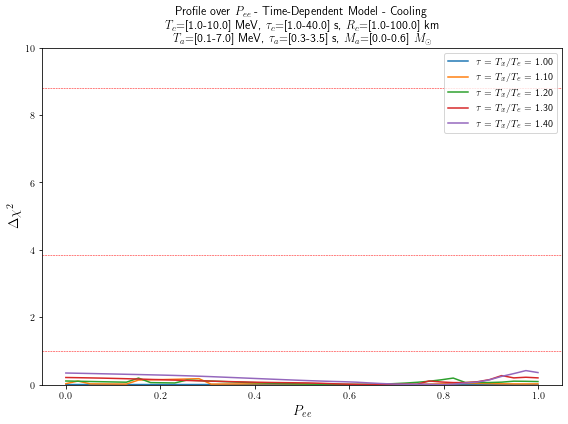

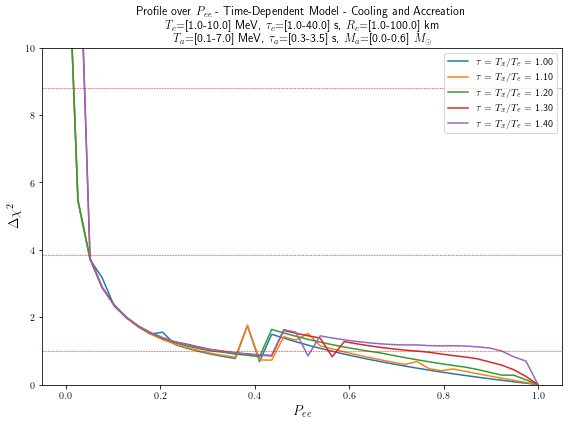

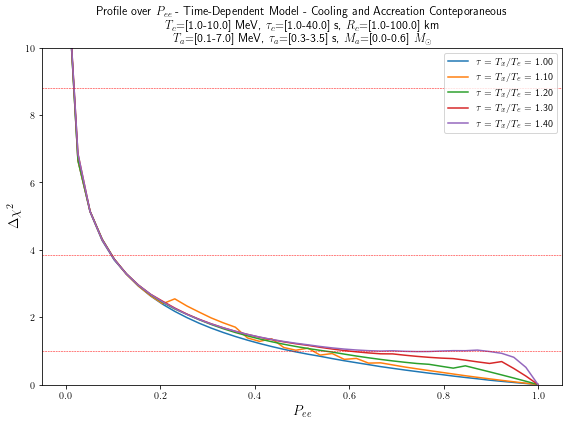

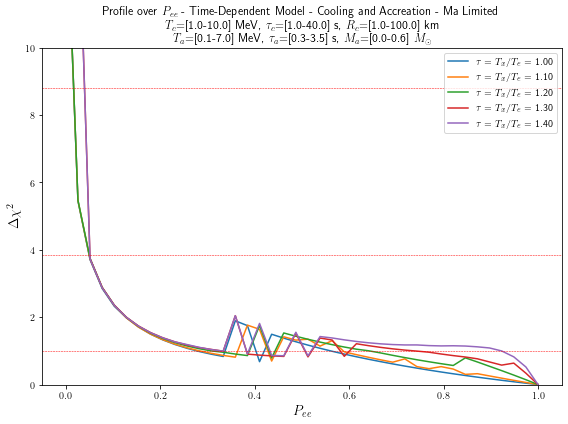

In [ ]:
plt.figure(figsize=(8, 6))

for i in range(len(tau_vec)):
    plt.plot(x_Pee_c[i],L_Pee_c[i],'-',label =r"$\tau=T_{x}/ T_{e}$ = %.2f"%(tau_vec[i]))
#plt.fill_between(x_Pee[0], L_Pee_min, L_Pee_max, alpha=0.3, label=r"Band %.1f $< \tau <$ %.1f"%(tau_vec[0],tau_vec[-1]))
plt.axhline(y=chi2.ppf(0.68, 1),ls='--', color='r', lw=0.5)
plt.axhline(y=chi2.ppf(0.95, 1),ls='--', color='r', lw=0.5)
plt.axhline(y=chi2.ppf(0.997, 1),ls='--', color='r', lw=0.5)
plt.xlabel(r"$P_{ee}$",fontsize=14)
plt.ylabel(r"$\Delta \chi^2$",fontsize=14)
plt.ylim(0,10)
plt.legend()
plt.title(r"Profile over $P_{ee}$ - Time-Dependent Model - Cooling"+"\n"+
             r"$T_c$=[%.1f-%.1f] MeV, $\tau_c$=[%.1f-%.1f] s, $R_c$=[%.1f-%.1f] km  "%(Tci,Tcf,tau_ci,tau_cf,Rci,Rcf)+"\n"
             r"$T_a$=[%.1f-%.1f] MeV, $\tau_a$=[%.1f-%.1f] s, $M_a$=[%.1f-%.1f] $M_\odot$  "%(Tai,Taf,tau_ai,tau_af,Mai,Maf))
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

for i in range(len(tau_vec)):
    plt.plot(x_Pee_c_a[i],L_Pee_c_a[i],'-',label =r"$\tau=T_{x}/ T_{e}$ = %.2f"%(tau_vec[i]))
#plt.fill_between(x_Pee[0], L_Pee_min, L_Pee_max, alpha=0.3, label=r"Band %.1f $< \tau <$ %.1f"%(tau_vec[0],tau_vec[-1]))
plt.axhline(y=chi2.ppf(0.68, 1),ls='--', color='r', lw=0.5)
plt.axhline(y=chi2.ppf(0.95, 1),ls='--', color='r', lw=0.5)
plt.axhline(y=chi2.ppf(0.997, 1),ls='--', color='r', lw=0.5)
plt.xlabel(r"$P_{ee}$",fontsize=14)
plt.ylabel(r"$\Delta \chi^2$",fontsize=14)
plt.ylim(0,10)
plt.legend()
plt.title(r"Profile over $P_{ee}$ - Time-Dependent Model - Cooling and Accreation"+"\n"+
             r"$T_c$=[%.1f-%.1f] MeV, $\tau_c$=[%.1f-%.1f] s, $R_c$=[%.1f-%.1f] km  "%(Tci,Tcf,tau_ci,tau_cf,Rci,Rcf)+"\n"
             r"$T_a$=[%.1f-%.1f] MeV, $\tau_a$=[%.1f-%.1f] s, $M_a$=[%.1f-%.1f] $M_\odot$  "%(Tai,Taf,tau_ai,tau_af,Mai,Maf))
plt.tight_layout()

plt.show()

plt.figure(figsize=(8, 6))

for i in range(len(tau_vec)):
    plt.plot(x_Pee_c_a_cont[i],L_Pee_c_a_cont[i],'-',label =r"$\tau=T_{x}/ T_{e}$ = %.2f"%(tau_vec[i]))
#plt.fill_between(x_Pee[0], L_Pee_min, L_Pee_max, alpha=0.3, label=r"Band %.1f $< \tau <$ %.1f"%(tau_vec[0],tau_vec[-1]))
plt.axhline(y=chi2.ppf(0.68, 1),ls='--', color='r', lw=0.5)
plt.axhline(y=chi2.ppf(0.95, 1),ls='--', color='r', lw=0.5)
plt.axhline(y=chi2.ppf(0.997, 1),ls='--', color='r', lw=0.5)
plt.xlabel(r"$P_{ee}$",fontsize=14)
plt.ylabel(r"$\Delta \chi^2$",fontsize=14)
plt.ylim(0,10)
plt.legend()
plt.title(r"Profile over $P_{ee}$ - Time-Dependent Model - Cooling and Accreation Conteporaneous"+"\n"+
             r"$T_c$=[%.1f-%.1f] MeV, $\tau_c$=[%.1f-%.1f] s, $R_c$=[%.1f-%.1f] km  "%(Tci,Tcf,tau_ci,tau_cf,Rci,Rcf)+"\n"
             r"$T_a$=[%.1f-%.1f] MeV, $\tau_a$=[%.1f-%.1f] s, $M_a$=[%.1f-%.1f] $M_\odot$  "%(Tai,Taf,tau_ai,tau_af,Mai,Maf))
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

for i in range(len(tau_vec)):
    plt.plot(x_Pee_c_a_Ma[i],L_Pee_c_a_Ma[i],'-',label =r"$\tau=T_{x}/ T_{e}$ = %.2f"%(tau_vec[i]))
#plt.fill_between(x_Pee[0], L_Pee_min, L_Pee_max, alpha=0.3, label=r"Band %.1f $< \tau <$ %.1f"%(tau_vec[0],tau_vec[-1]))
plt.axhline(y=chi2.ppf(0.68, 1),ls='--', color='r', lw=0.5)
plt.axhline(y=chi2.ppf(0.95, 1),ls='--', color='r', lw=0.5)
plt.axhline(y=chi2.ppf(0.997, 1),ls='--', color='r', lw=0.5)
plt.xlabel(r"$P_{ee}$",fontsize=14)
plt.ylabel(r"$\Delta \chi^2$",fontsize=14)
plt.ylim(0,10)
plt.legend()
plt.title(r"Profile over $P_{ee}$ - Time-Dependent Model - Cooling and Accreation - Ma Limited"+"\n"+
             r"$T_c$=[%.1f-%.1f] MeV, $\tau_c$=[%.1f-%.1f] s, $R_c$=[%.1f-%.1f] km  "%(Tci,Tcf,tau_ci,tau_cf,Rci,Rcf)+"\n"
             r"$T_a$=[%.1f-%.1f] MeV, $\tau_a$=[%.1f-%.1f] s, $M_a$=[%.1f-%.1f] $M_\odot$  "%(Tai,Taf,tau_ai,tau_af,Mai,Maf))
plt.tight_layout()
plt.show()